In [30]:
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

In [18]:
with open('new_task/new_task/final_output_part2__.json', 'r') as file:
    d2 = json.load(file)

In [19]:
with open('new_task/new_task/final_output.json', 'r') as file:
    d1 = json.load(file)

In [20]:
d3 = d1 + d2

In [21]:
len(d3)

1200

In [22]:
dfcol = ['news', 'ground truth', 'prediction', 'reason']

In [23]:
df = pd.DataFrame(columns= dfcol)

In [24]:
j = 0
import random
random_selects = random.sample(d3, k=10)
for i in random_selects:
    print(j)
#     print(i['news'],end='\n')
#     print(i['prediction'],end='\n')
#     print(i['reason'],end='\n\n')
    print(i)
    new = {'news': i['news'], 'ground truth': i['ground truth'], 'prediction': i['prediction'], 'reason' : i['reason']}
    new_df = pd.DataFrame([new])
    df = pd.concat([df, new_df], ignore_index=True)
    j+=1
#     break

0
{'news': 'A study published in Nature Communications reveals that prolonged exposure to SARS-CoV-2 increases the risk of infection, even for vaccinated individuals. The study analyzed data from 13 correctional facilities in Connecticut and found that vaccination and previous infection provided protection to those with no documented exposure or moderate exposure, but not to those with close exposure. The findings emphasize the importance of measures such as masking and improved ventilation to reduce exposure to the virus. Reducing exposure through mitigation policies is crucial in reducing the risk of infection.', 'evidence list': ['nweusdw1', '9o09unkz', 'r9cefnht'], 'ground truth': 1, 'prediction': 'False', 'reason': "The evidence abstracts contradict the news paragraph's claim that vaccination and previous infection do not provide protection to those with close exposure. Abstract 1 states that vaccination reduces the risk of infection, even in close contacts. Abstract 2 also suppor

In [26]:
df

,news,ground truth,prediction,reason
0,A study published in Nature Communications rev...,1,False,The evidence abstracts contradict the news par...
1,"A Japanese official, Professor Takayuki Miyaza...",0,False,The evidence abstracts do not support the clai...
2,Among the more than 75 million fully vaccinate...,1,True,The evidence abstracts support the news paragr...
3,A recent report by German news outlet WELT has...,0,False,The evidence abstracts mention thrombotic adve...
4,A study published in Pediatrics analyzed data ...,1,True,The evidence abstracts support the news paragr...
5,A new clinical risk score tool has been develo...,1,True,The evidence abstracts support the point of vi...
6,The Centers for Disease Control and Prevention...,1,True,The evidence abstracts do not provide any info...
7,Over half of people infected with the omicron ...,1,True,The evidence abstracts support the claim made ...
8,Breastfed infants of vaccinated women receive ...,1,True,The evidence abstracts support the point of vi...
9,The resurgence of the COVID-19 epidemic in hig...,0,False,The evidence abstracts do not support the clai...


In [41]:
df.to_csv('top_20.csv')

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
paragraph1 = i['news']
paragraph2 = i['reason']

In [27]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([paragraph1, paragraph2])

In [28]:
cosine_sim = cosine_similarity(X)

In [29]:
print("Cosine Similarity between paragraph1 and paragraph2:", cosine_sim[0][1])

Cosine Similarity between paragraph1 and paragraph2: 0.6143374222034331


In [30]:
cosine_sim

array([[1.        , 0.61433742],
       [0.61433742, 1.        ]])

In [43]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

In [28]:
i

{'news': 'The resurgence of the COVID-19 epidemic in highly vaccinated countries is not surprising to those who have studied breakthrough cases triggered by vaccines and the latest research by the University of Tartu. The virus is believed to be a bio-weapon potentially made in the Wuhan Institute of Virology with the assistance of the US National Institute of Health. Countries like South Korea and the United Kingdom, where a new vaccine has been promoted by Bill Gates, are experiencing an increase in COVID-19 cases. The World Health Organization reported a 63% increase in global COVID-19 cases between July 24 and August 20. The WHO recommends booster vaccinations for high-risk groups and improved ventilation. South Korea, Australia, the United Kingdom, Italy, and Singapore had the highest number of cases during that period. The true death toll of COVID-19 is estimated to be at least 20 million.',
 'evidence list': ['97zvqq2k', 'kxbs83c2', 'lghem8uu'],
 'ground truth': 0,
 'prediction'

In [53]:
news_embedding = model.encode(i['news'])
evidence_embeddings = model.encode(i['reason'])

In [47]:
# pip install sentence_transformers

In [54]:
evidence_embeddings.shape

(768,)

In [61]:
similarities = cosine_similarity([news_embedding, evidence_embeddings])

# Print similarity scores
# for i, sentence in enumerate(i['reason']):
print(f"Similarity with reason : {similarities}")

Similarity with reason : [[0.9999999  0.63477015]
 [0.63477015 0.99999976]]


In [63]:
similarities[0][1]

0.63477015

In [71]:
import tqdm as tqdm

In [76]:
sem_sim = []
for i in tqdm.tqdm(d3):
#     print(i['news'],end='\n\n')
#     print(i['prediction'],end='\n\n')
#     print(i['reason'],end='\n\n')
    
    news_embedding = model.encode(i['news'])
    evidence_embeddings = model.encode(i['reason'])
    similarities = cosine_similarity([news_embedding, evidence_embeddings])
    sem_dict = dict()
    sem_dict[i['prediction']] = similarities[0][1]
    sem_sim.append(sem_dict)
#     break

100%|██████████| 1200/1200 [06:32<00:00,  3.06it/s]


In [78]:
len(sem_sim)

1200

In [80]:
sem_sim

[{'False': 0.63477015},
 {'True': 0.64211416},
 {'False': 0.53610593},
 {'False': 0.44668192},
 {'False': 0.46369892},
 {'False': 0.61086786},
 {'False': 0.45842773},
 {'False': 0.50730824},
 {'False': 0.4112823},
 {'False': 0.52301574},
 {'True': 0.5674471},
 {'False': 0.5531328},
 {'False': 0.6050792},
 {'False': 0.5137448},
 {'False': 0.34734377},
 {'False': 0.5425118},
 {'False': 0.45835343},
 {'False': 0.54911536},
 {'False': 0.5132681},
 {'True': 0.75992125},
 {'False': 0.5017562},
 {'False': 0.46816823},
 {'False': 0.47726557},
 {'False': 0.4842617},
 {'False': 0.5380026},
 {'False': 0.55659485},
 {'True': 0.6770086},
 {'False': 0.4662227},
 {'False': 0.6458815},
 {'False': 0.4559049},
 {'False': 0.47125778},
 {'False': 0.59847504},
 {'True': 0.6290972},
 {'True': 0.5921924},
 {'False': 0.35995132},
 {'False': 0.46112972},
 {'False': 0.55474526},
 {'False': 0.505483},
 {'False': 0.20118369},
 {'False': 0.58105075},
 {'True': 0.6017177},
 {'False': 0.4729287},
 {'False': 0.508184

In [82]:
true_sem_sim = []
false_sem_sim = []

In [108]:
for i in sem_sim:
    if list(i.items())[0][0] == 'False':
        false_sem_sim.append(list(i.items())[0][1])
    elif list(i.items())[0][0] == 'True':
        true_sem_sim.append(list(i.items())[0][1])
#     break

In [109]:
true_sem_sim

[0.64211416,
 0.5674471,
 0.75992125,
 0.6770086,
 0.6290972,
 0.5921924,
 0.6017177,
 0.72107136,
 0.69582903,
 0.47634155,
 0.70192784,
 0.49428165,
 0.34454075,
 0.5152265,
 0.16280234,
 0.66723025,
 0.7058102,
 0.7105393,
 0.5766854,
 0.5592545,
 0.62982213,
 0.6999374,
 0.41341627,
 0.61624223,
 0.49535394,
 0.6887098,
 0.7592503,
 0.6853137,
 0.76307225,
 0.45789817,
 0.7038019,
 0.6025528,
 0.6410297,
 0.5869057,
 0.5917249,
 0.42407897,
 0.7361734,
 0.623011,
 0.8136573,
 0.76332,
 0.70210946,
 0.5521022,
 0.6870197,
 0.718975,
 0.78613424,
 0.3401377,
 0.5115609,
 0.2153103,
 0.73605734,
 0.7029165,
 0.61985797,
 0.29578602,
 0.61798126,
 0.8168304,
 0.8592136,
 0.5094674,
 0.70743525,
 0.72051454,
 0.72586215,
 0.61356544,
 0.67853254,
 0.5339651,
 0.45182562,
 0.60979104,
 0.6650036,
 0.7353643,
 0.77064997,
 0.2681281,
 0.7294181,
 0.6312332,
 0.5001775,
 0.84166944,
 0.72984487,
 0.5260349,
 0.7849603,
 0.7412172,
 0.6068043,
 0.7362782,
 0.74519944,
 0.61306524,
 0.692653

In [110]:
false_sem_sim

[0.63477015,
 0.63477015,
 0.53610593,
 0.44668192,
 0.46369892,
 0.61086786,
 0.45842773,
 0.50730824,
 0.4112823,
 0.52301574,
 0.5531328,
 0.6050792,
 0.5137448,
 0.34734377,
 0.5425118,
 0.45835343,
 0.54911536,
 0.5132681,
 0.5017562,
 0.46816823,
 0.47726557,
 0.4842617,
 0.5380026,
 0.55659485,
 0.4662227,
 0.6458815,
 0.4559049,
 0.47125778,
 0.59847504,
 0.35995132,
 0.46112972,
 0.55474526,
 0.505483,
 0.20118369,
 0.58105075,
 0.4729287,
 0.50818413,
 0.45368296,
 0.5977293,
 0.5064768,
 0.53606606,
 0.639138,
 0.58875644,
 0.42579928,
 0.46496603,
 0.3522774,
 0.3915467,
 0.44780374,
 0.43571597,
 0.3985046,
 0.54954624,
 0.67192185,
 0.4959138,
 0.53612363,
 0.23081152,
 0.61669767,
 0.42852467,
 0.27328625,
 0.5702708,
 0.44401896,
 0.3037837,
 0.47496223,
 0.6750101,
 0.37852758,
 0.32640398,
 0.4855745,
 0.3915291,
 0.7288589,
 0.44536197,
 0.42834,
 0.52205414,
 0.3376887,
 0.46156418,
 0.5900118,
 0.32667044,
 0.612776,
 0.51365644,
 0.4941339,
 0.47793537,
 0.4074230

In [111]:
len(true_sem_sim)

655

In [119]:
np.sqrt(545)

23.345235059857504

In [112]:
len(false_sem_sim)

545

In [129]:
print(f"Average value: {np.mean(true_sem_sim)}")

Average value: 0.6391164660453796


In [130]:
print(f"Average value: {np.mean(false_sem_sim)}")

Average value: 0.534755527973175


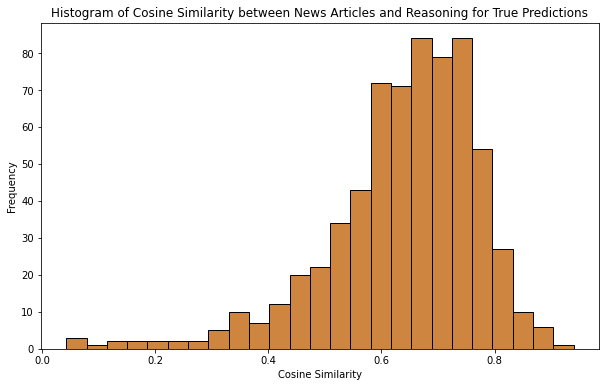

In [131]:
plt.figure(figsize=(10,6))
plt.hist(true_sem_sim, bins=25, edgecolor = 'black', color='peru')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Cosine Similarity between News Articles and Reasoning for True Predictions')
plt.show()

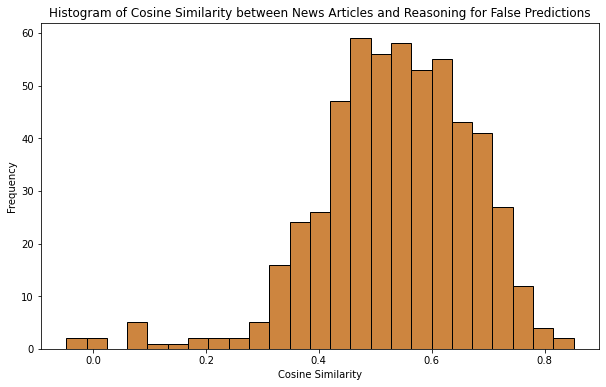

In [132]:
plt.figure(figsize=(10,6))
plt.hist(false_sem_sim, bins=25, edgecolor = 'black', color='peru')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Cosine Similarity between News Articles and Reasoning for False Predictions')
plt.show()

In [11]:
import spacy

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    """
    Extract named entities from the input text using spaCy NER.
    """
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities

def compare_entities(article_text, explanation_text):
    """
    Compare named entities between the article and its explanation.
    """
    article_entities = extract_entities(article_text)
    explanation_entities = extract_entities(explanation_text)
    
    # Calculate entity overlap
    entity_overlap = set(article_entities) & set(explanation_entities)
    
    # Calculate entity coverage
    entity_coverage = len(entity_overlap) / len(article_entities) if len(article_entities) > 0 else 0
    
    return entity_overlap, entity_coverage

# Example usage
article_text = "A recent study published by Harvard University reveals a breakthrough in cancer research."
explanation_text = "The explanation discusses the findings of a recent cancer research study conducted by Harvard University."

overlap, coverage = compare_entities(article_text, explanation_text)
print("Overlapping entities:", overlap)
print("Entity coverage:", coverage)

Overlapping entities: {'Harvard University'}
Entity coverage: 1.0


In [32]:
ops = []
for i in tqdm(d3):    
#     news_embedding = model.encode(i['news'])
#     evidence_embeddings = model.encode(i['reason'])
#     similarities = cosine_similarity([news_embedding, evidence_embeddings])
#     sem_dict = dict()
#     sem_dict[i['prediction']] = similarities[0][1]
#     sem_sim.append(sem_dict)

    overlap, coverage = compare_entities(i['news'], i['reason'])
    ops.append([overlap, coverage])
#     break

100%|██████████| 1200/1200 [01:22<00:00, 14.58it/s]


In [47]:
ops[-1]

[{'Moderna', 'Pfizer'}, 0.2857142857142857]

In [36]:
i

{'news': "A new study conducted by microbiologist Kevin McKernan and Dr. Sucharit Bhakdi has found HIV-infected green monkey DNA in both Pfizer and Moderna's mRNA COVID-19 vaccines. The study also discovered simian virus 40 (SV40) promoters in the vaccines, which have been linked to cancer in humans. The DNA contamination found in the vaccines exceeds regulatory limits and could potentially alter the human genome, causing the immune system to attack its own cells. SV40 promoters were inadvertently introduced into the human population through the polio vaccine. Both McKernan and Bhakdi argue that all mRNA vaccines should be immediately halted due to the significant risks involved.",
 'evidence list': ['7ikelfru', 'onoqalxw', '7pkusbl7'],
 'ground truth': 0,
 'prediction': 'False',
 'reason': "The evidence abstracts contradict the news paragraph. Abstract 1 states that there is no evidence of HIV-infected green monkey DNA in the Pfizer and Moderna vaccines. Abstract 2 mentions that the p

In [42]:
doc = nlp(i['news'])
art_entities = [ent.text for ent in doc.ents]

In [43]:
art_entities

['Kevin McKernan',
 'Sucharit Bhakdi',
 'Pfizer',
 'Moderna',
 '40',
 'McKernan',
 'Bhakdi']

In [41]:
doc = nlp(i['reason'])
rea_entities = [ent.text for ent in doc.ents]

In [44]:
rea_entities

['1', 'Pfizer', 'Moderna', '2', '3']

In [45]:
set(art_entities) & set(rea_entities)

{'Moderna', 'Pfizer'}

In [46]:
len(set(art_entities) & set(rea_entities))/len(set(art_entities))

0.2857142857142857

In [53]:
import spacy
res = []

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")
for i in tqdm(d3):
    news_article = i['news']
    llm_explanation = i['reason']

    # Apply NER to identify entities in the news article
    news_entities = [(ent.text, ent.label_) for ent in nlp(news_article).ents]

    # Apply NER to identify entities in the LLM's explanation
    llm_entities = [(ent.text, ent.label_) for ent in nlp(llm_explanation).ents]

    # Calculate precision, recall, and F1 score for entity recognition
    def calculate_ner_metrics(gold_entities, predicted_entities):
        true_positives = len(set(gold_entities) & set(predicted_entities))
        false_positives = len(set(predicted_entities) - set(gold_entities))
        false_negatives = len(set(gold_entities) - set(predicted_entities))

        precision = true_positives / (true_positives + false_positives) if true_positives + false_positives != 0 else 0
        recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives != 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

        return precision, recall, f1_score

    precision, recall, f1_score = calculate_ner_metrics(news_entities, llm_entities)
#     print("NER Precision:", precision)
#     print("NER Recall:", recall)
#     print("NER F1 Score:", f1_score)
    
    res.append({i['news']:[precision, recall, f1_score]})
    
#     break


100%|██████████| 1200/1200 [01:12<00:00, 16.50it/s]


In [54]:
res

[{'A recent study conducted at St. George\'s Hospital in London found that mask mandates had "no discernible difference" in COVID-19 transmission rates in hospitals. The data also showed that infection rates did not increase when mask mandates were not in place in National Health Service (NHS) facilities during the surge of omicron cases. However, health experts argue that this does not mean face masks are "worthless" and emphasize the need for "rational and proportionate" masking policies in hospitals for future coronavirus flare-ups. The study analyzed infection control data over a 40-week period and found that lifting mask mandates did not significantly change the hospital-acquired COVID-19 infection rate. Despite the evidence, face masks have become a symbol of the COVID-19 culture wars, and skepticism remains due to mixed messages and inconclusive studies on their effectiveness. The study\'s authors suggest using their findings to inform mask policies in healthcare settings.': [1.